In [1]:
import pyfar as pf
import numpy as np
import matplotlib.pyplot as plt


# Hausaufgabe 2: Rhino, Grasshopper und Pachyderm

Die Lösungen zur Hausaufgabe 2 (22P) sind je Gruppe als Zip-Archiv, bestehend aus folgenden Dateien, bis zum 26.06.2022 um 23:55 auf ISIS hochzuladen:

- PachydermRhinoGewandhaus1.3dm
- PachydermRhinoGewandhaus2.3dm
- PachydermGrasshopper.3dm
- PachydermGrasshopper.gh
- HA2.ipynb (diese Datei)

Pachyderm lässt sich nur auf Windows installieren. Auf macOS lässt sich Windows innerhalb einer Virtualisierungssoftware, wie Parallels oder VirtualBox installieren. Organisieren Sie sich innerhalb Ihrer Gruppe so, dass eine geeignete Platform zur Verfügung steht, in der die Software startet und die Simulation durchläuft (16 GB RAM sollten reichen).

## Links

Die Testversion von Rhino bietet vollen Funktionsumfang für 90 Tage:

https://www.rhino3d.com/download/

Pachyderm:

https://www.food4rhino.com/de/node/1877

Einen guten Einstieg bieten diese Tutorials (insbesondere auf Seite 2):

https://vimeo.com/showcase/4864877

## Aufgabe 1: Pachderm & Rhino (10P)

"Rhinoceros 3D" ist als NURB-basiertes CAD-Programm seit den 1990ern insbesondere in den Bereichen Architektur sowie Industrie- und Produktdesign verbreitet. Das Rhino-Plugin "Pachyderm Acoustics" ist eine Open-Source-Software des Architekten Arthur van der Harten, welche eine Vielzahl an Tools für die Raumakustiksimulation mitbringt. Ihre Aufgabe ist es, Pachyderm für die raumakustische Simulation des Gewandshaus Leipzig und zur Erzeugung einer Raumimpulsantwort zu nutzen.

![alt text](PachydermRhinoGewandhaus.png "Rhino Gewandhaus")
*Rhino Nutzeroberfläche*

### Allgemeine Hinweise

Seien Sie geduldig, nach Anstoßen der Simulation antwortet die Software einige Zeit nicht. Falls das Programm ungewohnt lange nicht antwortet und abgestürzt sein sollte liegt vermutlich einer der folgenden Fehler vor:

- Materialien sind nicht den Ebenen zugeordnet
- Anzahl der Rays sind für den PC zu hoch
- Quellen und Empfänger sind nicht richtig definiert
- Falls Ebenen auf der Pachydermoberfläche nicht angezeigt werden, hilft es Rhino und die Datei neu zu laden

**In Pachyderm Material anlegen, Ebene Material zuordnen:**
1. Material mit Namen anlegen bzw. speichern, Absorption anpassen und speichern
2. Die Ebene in Pachyderm auswählen und das passende Material anklicken (das zuletzt angeklickte Material wird der Ebene zugeordnet)
3. Streugrade der Ebene zuordnen (lassen sich ggf. leider nicht mit dem Material abspeichern)

### Aufgabe A (3P)

Öffnen Sie die Datei "PachydermRhinoGewandhaus.3dm" und `Pachyderm_Acoustics` (In die Kommandozeile von Rhino eingeben und mit *Enter* bestätigen) und machen Sie sich mit der Nutzeroberfläche vertraut. Erstellen Sie akustische Materialien mit den Absorptions- und Streukoeffizienten aus der Datei "AbsorptionsAndScatteringsPercentages.xlsx", bennen Sie Materialien (Pachyderm) und zugehörige Ebenen (Rhino), nach den Namen der Tabellenblätter und weisen Sie jeder Ebene das entsprechende Material zu. Für die Ebene "Seats" verwenden Sie bitte das Material "Seats unoccupied - Medium upholstered" (Benarek 2004).

### Aufgabe B (2P)

Fügen Sie dem Modell eine Quelle / Dodekaeder (`Insert_Source`) und einen Empfänger (`Insert_Receiver`) an Positionen mittig auf der Bühne und im Puplikum hinzu. Ermitteln Sie außerdem das ungefähre Volumen des Saals.

*Volumen hier eintragen*

Von Rhino über die Funktion Analyze -> Mass Properties -> Volume berechnet.

V_Rhino = 22051.6047 $m^3$ 

Aus "Seats unoccupied - Medium upholstered" (Weinzierl et al., 2010) entnommenes Volumen:

V_Weinzierl = 21000 $m^3$

### Aufgabe C (1P)

Starten Sie die Simulation mit folgenden Einstellungen:

- IS Order: 2
- Number of Rays: 25 * V (in m³)
- Cutoff time: 2000 ms

Ermitteln Sie die Nachhallzeiten T30 und speichern Sie die Datei als "PachydermRhinoGewandhaus1.3dm".

*T30 für alle Oktavbänder hier eintragen*

| 62.5 Hz | 125 Hz | 250 Hz | 500 Hz | 1000 Hz | 2000 Hz | 4000 Hz | 8000 Hz |
|---------|--------|--------|--------|---------|---------|---------|---------|
| 1.68 s  | 1.74 s | 1.92 s | 2.04 s | 2.3 s   | 1.92 s  | 1.69 s  | 1.54 s  |

### Aufgabe D (2P)

Wiederholen Sie Aufgabe C. Verwenden Sie diesmal jedoch das Material "Audience, seats fully occupied - Medium upholstered" (Benarek 2004) für die entsprechende Ebene "Seats". Speichern Sie die Datei als "PachydermRhinoGewandhaus2.3dm".

*T30 für alle Oktavbänder hier eintragen*

| 62.5 Hz | 125 Hz | 250 Hz | 500 Hz | 1000 Hz | 2000 Hz | 4000 Hz | 8000 Hz |
|---------|--------|--------|--------|---------|---------|---------|---------|
| 1.64 s  | 1.66 s | 1.79 s | 1.88 s | 2.09 s  | 1.65 s  | 1.42 s  | 1.31 s  |

Erläutern Sie kurz, inwiefern sich die Nachhallzeit geändert hat.

*Erläuterung*

### Aufgabe E (2P)

Exportieren Sie die die Raumimpulsantworten, laden Sie diese mithilfe von Pyfar und plotten Sie diese im Zeitbereich sowie das Betragsspektrum.

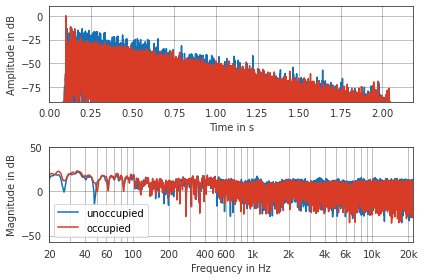

In [2]:
# Pyfar Lösungen hier einfügen
unoccupied_rir = pf.io.read_wav('unoccupied_rir.wav')
unoccupied_rir.time *= 1/np.max(np.abs(unoccupied_rir.time))
occupied_rir = pf.io.read_wav('occupied_rir.wav')
occupied_rir.time *= 1/np.max(np.abs(occupied_rir.time))

pf.plot.time_freq(unoccupied_rir, label='unoccupied', dB_time=True)
pf.plot.time_freq(occupied_rir, label='occupied', dB_time=True)
plt.legend()


## Aufgabe 2: Pachderm & Grasshopper (12P)

Grasshopper ist eine visuelle Programmiersprache und seit Rhino 6.0 fester Bestandteil der CAD-Software. Es ermöglicht **parametrisches Design**, also die Erzeugung von Formen und anderen Eigenschaften in CAD über Algorithmen und deren Manipulation über Parameter. Das **generative Design** baut hierauf auf und ermöglicht die Erzeugung völlig neuer Formen bspw. basierend auf evolutionären Algorithmen.

In der Rhino-Datei "PachydermGrasshopper.3dm" ist ein Raum als Quader mit den Abmessungen 10 x 8 x 4 m³ modelliert. Mittels Grasshopper soll ein Decken-Panel in Höhe und Größe variiert werden, sodass sich die raumakustischen Eigenschaften C50 und das Stärkemaß (hier wird zur Vereinfachung die SPL-Komponente verwendet) ändern. Die Simulation und Auswertung erfolgt über die Grasshopperkomponenten von Pachyderm. Nutzen Sie zur Lösung der Aufgabe die Dateien "PachydermGrasshopper.3dm" und "PachydermGrasshopper.gh". Die folgenden Aufgaben finden sich genauso in der Grasshopper Solution "PachydermGrasshopper.gh" auf dem Canvas in der Nähe der jeweils zugehörigen Gruppen (weiß unterlegte Bereiche) wieder.

![alt text](PachydermGrasshopper.png "Pachyderm Grasshopper")
*Grasshopper und Rhino Nutzeroberfläche*


### Allgemeine Hinweise

* Sperren Sie den Solver, bevor Sie Änderungen vornehmen, um das Initiieren der Simulation zu unterbinden. 
* Der Einfachheit halber wurde SPL anstelle des eigentlich passenderen Stärkemaßes verwendet.

### Tipps

1. ALT-Rechts + Mausklick links auf die Komponente
2. CTRL (+Shift) + Pfeil Links/Rechts um Verbindungen zwischen Komponenten nachverfolgen zu können.
3. Doppelklick, dann `//` für Panels
4. Display -> Draw full Names / Icons
5. Mittlere Maustaste: Sperren des Solvers / der Komponente, s. Screenshot:

![alt text](middle_mouse.png "Mittlere Maustaske Solver/Komponente deaktivieren")

### Aufgabe A (2P)

Verbinden Sie die Komponenten so, dass das Panel in einem Abstand von 1,0 bis 0,1 m zur Decke positioniert und die Fläche von 0 bis 100 % der Deckenfläche variiert werden können.

**Hinweis:**

Verwenden Sie `<` um die ensprechenden Slider zu definieren.

### Aufgabe B (1P)

Verbinden Sie die Komponenten so, dass das akustische Panel als Bestandteil der Pachyderm *Pylogon Scene* verstanden und das passende akustische Material verwendet wird. Hierfür sollen den Ebenen *Floor*, *Wall*, *Ceiling* und *Panel* in Rhino die ensprechenden Absorptions- und Streukoeffizienten aud der Tabelle "AbsorptionsAndScatteringsPercentages.xlsx" in der Pachderm-Nutzeroberfläche zugeordnet werden.

### Aufgabe C (2P)

Definieren Sie den Sitzbereich, indem Sie  der Surface-Komponente "SeatingArea" eine Referenz zur Fläche, die im Rhino-Projekt definiert ist und über einem Teil der Bodenfläche schwebt, hinzufügen.

Erzeugen Sie im Sitzbereich 9 äquidistante Empfängerpositionen mithilfe der Grid-Komponente. Verbinden Sie die Komponenten so, dass Sie 9 valide Empfänger und eine Quelle für die anschließende Simulation haben.

### Aufgabe D (1P)

Verbinden Sie folgende Eingänge jeweils mit Slidern und stellen Sie sie auf die entpsrechenden Werte ein:

- Order bzw. IS_Order: 2
- RayCt: 10.000
- CO_Time: 2000

**Hinweis:**

Sperren Sie den Solver vor der Einstellung!

### Aufgabe E (2P)

Stellen Sie die Komponenten unten so ein, dass C50 und SPL in den Oktavbändern für 500 und 1000 Hz berechnet wird.

### Aufgabe F (2P)

Passen Sie die Höhe und Fläche des Panels sukzessive an, sodass ein guter Kompromiss aus Klarheitsmaß (C50) und außreichend hohem Schalldruckpegel (SPL)  gefunden werden kann.

**Hinweis:**

Der Ausgangswert aus dem Cluster ist zu maxmieren und sollte idealerweise größer als 1 sein.

Sperren Sie den Solver vor der Einstellung!

### Aufgabe G (2P)

Erläutern Sie kurz, wie sich die Positionierung von Absorbern auf das Klarheits- und Stärkemaß auswirken können.

Klarheitsmaß steigt tendenziell mit Größe des Panels, wobei die zwei Maxima vor 100% Größe sind (ca. 0.975 und 0.85)


Das Stärkemaß sinkt mit Größe des Panels, ändert sich aber mit Abstand des Panels von der Decke kaum. Dies könnte daran liegen, dass im Stärkemaß das komplette Abklingen des Signals im Raum mit dem Abklingen im Freifeld verglichen wird. Der zeitliche Verlauf der Impulsantwort ist dafür also irrelevant, es zählt hier eher die Zunahme an Absorption durch die größere Panelfläche, die für eine Verringerung der Nachhallzeit sorgt. Der Abstand zur Decke hat also wenig Auswirkungen.

Durch die verringerte Nachhallzeit steigt auch das Klarheitsmaß an, da der frühen Teil der Impulsantwort im Vergleich zum späteren Teil größer wird. Die in den Messwerten ersichtliche Maxima des Klarheitsmaßes könnten dadurch zustandekommen, dass ein Teil des Schalls wiederholt zwischen Absorber und Decke reflektiert und absorbiert wird. So könnte ein Teil der Schallwellen, die sonst den Empfänger erreicht hätten, bereits dort so stark abgeschwächt werden, dass die Amplitude im hinterer Teil der Impulsantwort kleiner wird.

Die beiden Maxima (Erklärung?)

Klarheitsmaß hat, abhängig von der Größe des Panels, Maxima bei verschiedenen Abständen (bei Größe von 97,5% bspw. bei ca. 0.8m und 0.1m)